<a href="https://colab.research.google.com/github/cindy1404hsieh/Ciencia-de-Datos/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de librerias

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

# Traer dataframes

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/y_train.csv')
X_validation = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/X_validation.csv')
y_validation = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/y_validation.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/X_test.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/test.csv')

# Random Forest con busqueda de hiperparametros

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
rf_model = RandomForestRegressor(random_state=4)
rf_params = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_params,
                               n_iter=5,
                               scoring='neg_root_mean_squared_error',
                               cv=tscv,
                               verbose=5,
                               n_jobs=1,
                               random_state=50)


rf_random.fit(X_train, y_train.to_numpy().ravel())


best_rf = rf_random.best_estimator_

rf_pred = best_rf.predict(X_validation)
rf_rmse = np.sqrt(mean_squared_error(y_validation, rf_pred))

print("Random Forest RMSE: %f" % (rf_rmse))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=-3.589 total time=  30.7s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=-4.202 total time= 1.1min
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=-3.602 total time= 1.8min
[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=-3.790 total time= 2.5min
[CV 5/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=-3.743 total time= 3.3min
[CV 1/5] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=-3.465 total time=  17.4s
[CV 2/5] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=-4.047 total time=

In [ ]:
rf_pred = best_rf.predict(X_train)
rf_rmse = np.sqrt(mean_squared_error(y_train, rf_pred))

print("RMSE set de entrenamiento: %f" % (rf_rmse))

RMSE set de entrenamiento: 3.452478


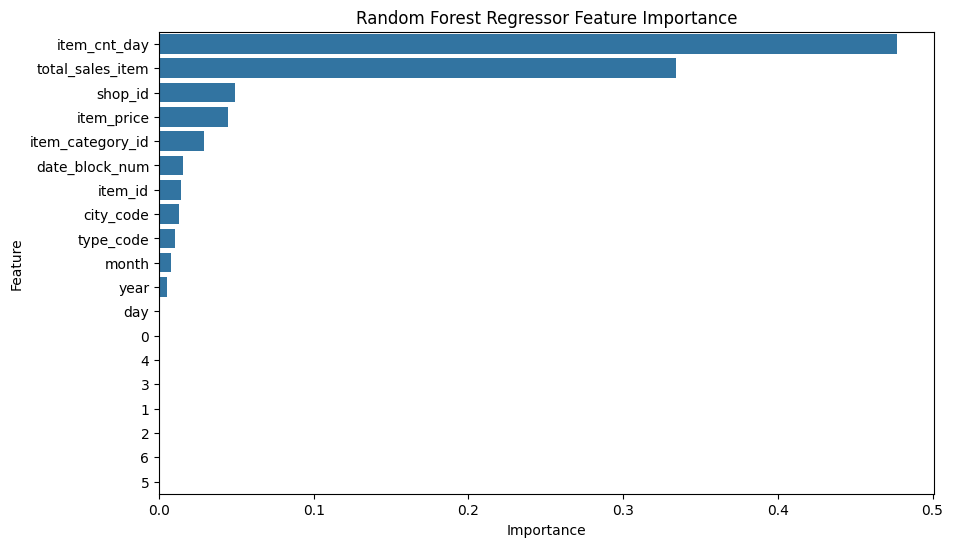

In [ ]:
rf_importance = best_rf.feature_importances_
rf_features = X_train.columns
rf_importance_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_importance})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Random Forest Regressor Feature Importance')
plt.show()

In [ ]:
y_test = np.ravel(best_rf.predict(X_test).clip(0,20))

In [ ]:
submission = pd.DataFrame({
    "ID": test['ID'],
    "item_cnt_month": y_test
})

submission

,ID,item_cnt_month
0,0,1.438930
1,1,1.036283
2,2,1.451173
3,3,1.451173
4,4,1.036283
...,...,...
214195,214195,1.974442
214196,214196,1.670179
214197,214197,1.535722
214198,214198,1.036283


In [ ]:
submission.to_csv('/content/drive/MyDrive/Colab_Notebooks/prediccion_random_forest.csv', index=False)